### In this programming assignment, we will classify IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spread in an embedding.  Ideally, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embeddings.
- The glove embedding: we use the pre-trained 100 dimensional GloVe word embedding
- The dense embedding: we use the glove embedding as the initial embbedding, and jointly train the embedding and the calssifier using a densely connected network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding, and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack two GRU layers to build our classifier. We use the dropout and recurrent_dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy. Note 90% is not an easy target. We need to save the best model during the trainning, and load the best model when we do the testing.

### Note you only need to fill in part of the code. But you do need to run all the code and generate your own results. Your results could be different from mine.

### Note you need to follow the textbook to download the IMDB text reviews and the GloVe embeddings.

In [1]:
import keras
keras.__version__

/Users/uconn/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

### First we read a list of positive words from a file. Then we read a list of negative words from another file.

In [2]:
filepath = 'positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

lighter
likable
like
liked
likes
liking
lionhearted
lively
logical
long-lasting
lovable
lovably
love
loved
loveliness
lovely
lover
loves
loving
low-cost
low-price
low-priced
low-risk
lower-priced
loyal
loyalty
lucid
lucidly
luck
luckier
luckiest
luckiness
lucky
lucrative
luminous
lush
luster
lustrous
luxuriant
luxuriate
luxurious
luxuriously
luxury
lyrical
magic
magical
magnanimous
magnanimously
magnificence
magnificent
magnificently
majestic
majesty
manageable
maneuverable
marvel
marveled
marvelled
marvellous
marvelous
marvelously
marvelousness
marvels
master
masterful
masterfully
masterpiece
masterpieces
masters
mastery
matchless
mature
maturely
maturity
meaningful
memorable
merciful
mercifully
mercy
merit
meritorious
merrily
merriment
merriness
merry
mesmerize
mesmerized
mesmerizes
mesmerizing
mesmerizingly
meticulous
meticulously
mightily
mighty
mind-blowing
miracle
miracles
miraculous
miraculously
miraculousness
modern
modest
modesty
momentous
monumental
monumentally
morality
moti

In [3]:
filepath = 'negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

instigators
insubordinate
insubstantial
insubstantially
insufferable
insufferably
insufficiency
insufficient
insufficiently
insular
insult
insulted
insulting
insultingly
insults
insupportable
insupportably
insurmountable
insurmountably
insurrection
intefere
inteferes
intense
interfere
interference
interferes
intermittent
interrupt
interruption
interruptions
intimidate
intimidating
intimidatingly
intimidation
intolerable
intolerablely
intolerance
intoxicate
intractable
intransigence
intransigent
intrude
intrusion
intrusive
inundate
inundated
invader
invalid
invalidate
invalidity
invasive
invective
inveigle
invidious
invidiously
invidiousness
invisible
involuntarily
involuntary
irascible
irate
irately
ire
irk
irked
irking
irks
irksome
irksomely
irksomeness
irksomenesses
ironic
ironical
ironically
ironies
irony
irragularity
irrational
irrationalities
irrationality
irrationally
irrationals
irreconcilable
irrecoverable
irrecoverableness
irrecoverablenesses
irrecoverably
irredeemable
irredee

unusual
unusually
unviewable
unwanted
unwarranted
unwatchable
unwelcome
unwell
unwieldy
unwilling
unwillingly
unwillingness
unwise
unwisely
unworkable
unworthy
unyielding
upbraid
upheaval
uprising
uproar
uproarious
uproariously
uproarous
uproarously
uproot
upset
upseting
upsets
upsetting
upsettingly
urgent
useless
usurp
usurper
utterly
vagrant
vague
vagueness
vain
vainly
vanity
vehement
vehemently
vengeance
vengeful
vengefully
vengefulness
venom
venomous
venomously
vent
vestiges
vex
vexation
vexing
vexingly
vibrate
vibrated
vibrates
vibrating
vibration
vice
vicious
viciously
viciousness
victimize
vile
vileness
vilify
villainous
villainously
villains
villian
villianous
villianously
villify
vindictive
vindictively
vindictiveness
violate
violation
violator
violators
violent
violently
viper
virulence
virulent
virulently
virus
vociferous
vociferously
volatile
volatility
vomit
vomited
vomiting
vomits
vulgar
vulnerable
wack
wail
wallow
wane
waning
wanton
war-like
warily
wariness
warlike
warne

# Using word embeddings

Another popular and powerful way to associate a vector with a word is the use of dense "word vectors", also called "word embeddings". 
While the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings". 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the 
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different 
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of 
such a noisy, unstructured embedding space. 

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words. 
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect 
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two 
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points 
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the 
embedding space to be meaningful. 

[...]


In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For 
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings". 
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing 
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are 
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more 
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an 
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language 
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it 
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding 
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed 
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The 
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets 
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that 
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a 
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or 
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space 
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking 
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec 
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one 
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word 
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made 
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec 
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization 
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a 
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in 
Keras, we will start from scratch, by downloading the original text data.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [4]:
import os

imdb_dir = '/Users/uconn/Dropbox/UCONN/Research/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
texts[:2]

["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think 

In [6]:
labels[:2]

[0, 0]

In [7]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, 
task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 
samples. So we will be learning to classify movie reviews after looking at just 200 examples...


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 500 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [9]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [10]:
data.shape

(25000, 500)

### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [11]:
glove_dir = '/Users/uconn/Dropbox/UCONN/Research/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [12]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, the word_index and its word index is no more than max_word.

Obtain L_NEG: 
* the list of negative words, where each word is in the embedding, the word_index and its word index is no more than max_word.

In [13]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] <= max_words:        
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(706, 1163)

Print the top 100 most frequently used positive words from L_POS.

In [14]:
# fill in your code here

print(P)

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'top', 'classic', 'enjoy', 'recommend', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'amazing', 'humor', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'hero', 'hilarious', 'cool', 'happy', 'important', 'talent', 'modern', 'clearly', 'supporting', 'fast', 'romantic', 'enjoyable', 'easy', 'fantastic', 'clear', 'famous', 'realistic', 'leads', 'greatest', 'believable', 'free', 'hot', 'superb', 'memorable', 'beauty', 'perfectly', 'worked', 'incredibly', 'leading', 'powerful', 'masterpiece', 'fairly', 'talented', 'success', 'rich', 'cute', 'sweet', 'incredible', 'pure', 'popular', 'convincing', 'intelligent', 'clever', 'successful', 'positive', 'exciting', 'effective', 'amusing', 'appreciate', 'solid', 'impressive', 'respect', 'super', 'win', 'recommended', 'awesome',

Print the top 100 most frequently used negative words from L_NEG.

In [15]:
# fill in your code here

print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'death', 'dead', 'wrong', 'boring', 'awful', 'stupid', 'terrible', 'lost', 'worse', 'waste', 'problem', 'evil', 'killer', 'dark', 'unfortunately', 'kill', 'horrible', 'slow', 'killed', 'lack', 'murder', 'crap', 'hell', 'annoying', 'sad', 'scary', 'ridiculous', 'strange', 'disappointed', 'cheap', 'silly', 'problems', 'miss', 'falls', 'mystery', 'dull', 'die', 'hate', 'sorry', 'fall', 'weak', 'crime', 'doubt', 'lame', 'poorly', 'zombie', 'difficult', 'killing', 'shame', 'badly', 'weird', 'crazy', 'mess', 'creepy', 'cheesy', 'monster', 'joke', 'break', 'dumb', 'fails', 'twist', 'odd', 'sadly', 'cold', 'missed', 'wasted', 'revenge', 'tension', 'fear', 'kills', 'bored', 'trouble', 'violent', 'died', 'pointless', 'trash', 'bizarre', 'impossible', 'mad', 'prison', 'sick', 'disturbing', 'failed', 'fake', 'fiction', 'pathetic', 'garbage', 'utterly', 'attack', 'loud', 'unbelievable', 'twists', 'complex', 'mistake']


### Define a model

We will be using the same model architecture as before:

### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.7046 - acc: 0.6401 - val_loss: 0.5905 - val_acc: 0.6838
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4760 - acc: 0.7717 - val_loss: 0.6157 - val_acc: 0.7214
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3639 - acc: 0.8357 - val_loss: 0.5880 - val_acc: 0.7266
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2733 - acc: 0.8851 - val_loss: 0.7037 - val_acc: 0.7302
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1974 - acc: 0.9194 - val_loss: 0.8447 - val_acc: 0.7174
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1436 - acc: 0.9444 - val_loss: 0.9327 - val_acc: 0.7284
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0999 - acc: 0.9625 - val_loss: 1.0989 - val_acc:

In [17]:
def plot_history(history):
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

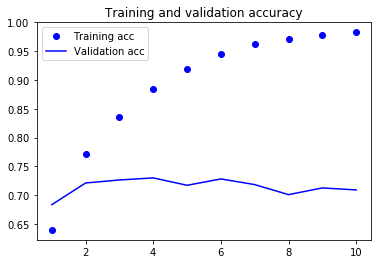

In [18]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('joint_trained_glove_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.7044 - acc: 0.5921 - val_loss: 0.5763 - val_acc: 0.7408
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4555 - acc: 0.8155 - val_loss: 0.4115 - val_acc: 0.8206
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2610 - acc: 0.8976 - val_loss: 0.3775 - val_acc: 0.8452
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1464 - acc: 0.9471 - val_loss: 0.5597 - val_acc: 0.8268
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0759 - acc: 0.9751 - val_loss: 0.4810 - val_acc: 0.8526
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0365 - acc: 0.9888 - val_loss: 0.5944 - val_acc: 0.8424
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0140 - acc: 0.9961 - val_loss: 0.7421 - val_acc:

Let's plot its performance over time:

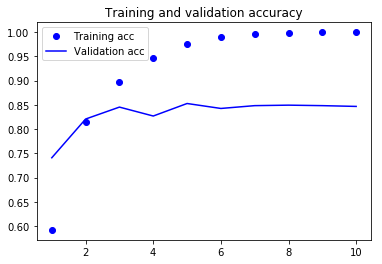

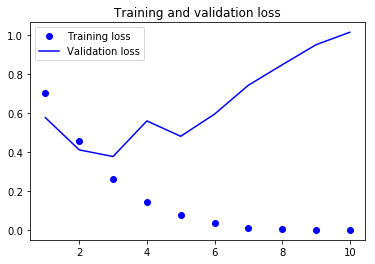

In [20]:
plot_history(history)

Obtain embedding_matrix1 from the embedding layer.

In [21]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [22]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('joint_trained_LSTM_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 289s 14ms/step - loss: 0.5369 - acc: 0.7233 - val_loss: 0.4039 - val_acc: 0.8236
Epoch 2/10
20000/20000 [==============================] - 286s 14ms/step - loss: 0.3296 - acc: 0.8622 - val_loss: 0.2840 - val_acc: 0.8866
Epoch 3/10
20000/20000 [==============================] - 282s 14ms/step - loss: 0.2401 - acc: 0.9064 - val_loss: 0.2798 - val_acc: 0.8824
Epoch 4/10
20000/20000 [==============================] - 284s 14ms/step - loss: 0.1927 - acc: 0.9276 - val_loss: 0.2496 - val_acc: 0.8968
Epoch 5/10
20000/20000 [==============================] - 280s 14ms/step - loss: 0.1579 - acc: 0.9429 - val_loss: 0.2674 - val_acc: 0.9014
Epoch 6/10
20000/20000 [==============================] - 283s 14ms/step - loss: 0.1304 - acc: 0.9538 - val_loss: 0.2719 - val_acc: 0.8990
Epoch 7/10
20000/20000 [==============================] - 283s 14ms/step - loss: 0.1074 - acc: 0.9637 - val_loss: 0.2

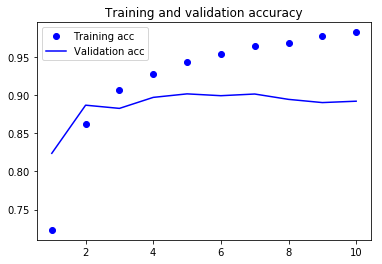

In [23]:
plot_history(history)

Obtain embedding_matrix2 from the embedding layer.

In [24]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [25]:
embedding_matrix2.shape

(10000, 100)

Implement the following three functions that measure the distance between words in the three different embeddings.

In [26]:
def word_dist(word1, word2, embedding_matrix):
    # fill in your code here


def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [27]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
True
False


In [28]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
False


In [29]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [30]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

True
True
False


Find the nearest neighhor of a word for the three embeddings.

In [31]:
def NN_general(word, embedding_matrix):
    # fill in your code here

    
def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [32]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accessible available convenient
:::: accomplished accomplish accomplishment
:::: admirer ironically avid
:::: angel heaven devil
:::: appropriate effective proper
:::: authentic exquisite genuine
:::: balanced consistent sensible
:::: bargain dragged modest
:::: beautifully nicely wonderfully
:::: bloom frost hardy
:::: brilliant dazzling superb
:::: brilliantly cleverly superbly
:::: clever imaginative clumsy
:::: comfortable enjoying easy
:::: compassionate humble sober
:::: convenient useful easier
:::: crisp cool delicious
:::: cute goofy adorable
:::: delight awe joy
:::: ecstasy heroine addict
:::: efficient simpler effective
:::: empathy disdain compassion
:::: energetic playful spirited
:::: engaging distracting spirited
:::: engrossing mesmerizing captivating
:::: enhances detract enhanced
:::: enjoyment happiness pleasure
:::: enlightenment inspiration perfection
:::: enough hard better
:::: excellently superbly fantastically
:::: fabulous gorgeous marvelous
:::: fantast

List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [33]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: admire despise appreciate
:::: amusing comical hilarious
:::: appreciate appreciated admire
:::: awe inspiring delight
:::: better enough good
:::: breakthrough progress success
:::: consistently fairly clearly
:::: daring spirited heroic
:::: decent lousy respectable
:::: dedicated well works
:::: delicious lovely delightful
:::: delightfully stunningly wonderfully
:::: deservedly masterfully ironically
:::: easier difficult easy
:::: entertain indulge amuse
:::: exciting entertaining interesting
:::: fame legendary talent
:::: famed renowned legendary
:::: famous renowned famed
:::: feat accomplishment accomplished
:::: fun entertaining wonderful
:::: gem marvelous gems
:::: genius incredible obsession
:::: glamorous flashy stylish
:::: good well better
:::: groundbreaking controversial noteworthy
:::: hero nemesis beloved
:::: hilarious witty amusing
:::: homage parody beloved
:::: honest thoughtful straightforward
:::: humble wise cheerful
:::: humorous comical amusing
:::: im

Get the list of the words that each word's nearest neighbor is different in glove embedding, dense embedding and LSTM embedding.

In [34]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: appealing appeal oddly ironically
:::: available limited variety well
:::: avid admirer passionate ironically
:::: beauty obsession gorgeous beautiful
:::: believable contrived captivating endearing
:::: boost improve enhance helped
:::: bravo knock angel superb
:::: clean enough safe well
:::: consistent inconsistent spite fairly
:::: contribution benefit achievement exceptional
:::: conveniently cleverly oblivious shamelessly
:::: convincing unconvincing appealing proving
:::: dazzling breathtaking mesmerizing splendid
:::: endearing captivating lovable likable
:::: fans angry cheer enthusiastic
:::: finest splendid greatest magnificent
:::: fresh hot strong unexpected
:::: futuristic cartoonish spooky surreal
:::: glad thankful pleased thrilled
:::: goodness perfection fortunately greatness
:::: gusto mesmerizing maniacal liking
:::: healthy better good stable
:::: heroine hero lover obsession
:::: impeccable masterful admirable modesty
:::: intimate fascinating entertaining li

Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [35]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: accomplishment remarkable accomplished accomplished
:::: admirably excellently masterfully masterfully
:::: afford willing prefer prefer
:::: beloved loved legendary legendary
:::: bliss idiocy madness madness
:::: blockbuster smash hallmark hallmark
:::: brilliance originality dazzling dazzling
:::: celebrate celebration celebrated celebrated
:::: cheer delight cry cry
:::: commitment promise respect respect
:::: compassion empathy kindness kindness
:::: confident satisfied optimistic optimistic
:::: coolest scariest strangest strangest
:::: credible consistent reliable reliable
:::: darling wise crook crook
:::: dashing hapless spirited spirited
:::: divine blessing revelation revelation
:::: encourage helping enhance enhance
:::: enhance improve enhanced enhanced
:::: entertains betrays excels excels
:::: excellent terrific superb superb
:::: fairly remarkably reasonably reasonably
:::: fascinating interesting intriguing intriguing
:::: fortunate thankful lucky lucky
:::: fortu

:::: unconvincing mesmerizing implausible implausible
:::: unfinished masterpiece monumental monumental
:::: unpleasant unsettling irritating irritating
:::: unravel doomed revive revive
:::: violent vicious brutal brutal
:::: wasted ironically unfortunately unfortunately
:::: weaker weak stronger stronger
:::: weakness weak concern concern
209


Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [36]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound wonders wonders wonders
:::: abundance peculiar peculiar peculiar
:::: acclaim praise praise praise
:::: acclaimed renowned renowned renowned
:::: accomplish accomplished accomplished accomplished
:::: accurate precise precise precise
:::: accurately correctly correctly correctly
:::: achievement achievements achievements achievements
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admiration affection affection affection
:::: adorable cute cute cute
:::: adore despise despise despise
:::: advanced improved improved improved
:::: advantage gain gain gain
:::: adventurous imaginative imaginative imaginative
:::: affection admiration admiration admiration
:::: amazed thrilled thrilled thrilled
:::: amazing incredible incredible incredible
:::: amazingly astonishingly astonishingly astonishingly
:::: ambitious promising promising promising
:::: ample sufficient sufficie

:::: influential prominent prominent prominent
:::: ingenious inventive inventive inventive
:::: insightful thoughtful thoughtful thoughtful
:::: inspiration inspiring inspiring inspiring
:::: inspire inspiring inspiring inspiring
:::: integrated dynamic dynamic dynamic
:::: intelligence critical critical critical
:::: intelligent smart smart smart
:::: interests regard regard regard
:::: intricate exquisite exquisite exquisite
:::: inventive imaginative imaginative imaginative
:::: irresistible enchanting enchanting enchanting
:::: jolly grumpy grumpy grumpy
:::: keen eager eager eager
:::: kindly grumpy grumpy grumpy
:::: kindness compassion compassion compassion
:::: kudos liking liking liking
:::: leading led led led
:::: led leading leading leading
:::: legendary famed famed famed
:::: liberty freedom freedom freedom
:::: lighter thinner thinner thinner
:::: likes loves loves loves
:::: liking dislike dislike dislike
:::: logical rational rational rational
:::: lovable endearing e

:::: abrupt unexpected unexpected unexpected
:::: absence spite spite spite
:::: accidental fatal fatal fatal
:::: addict addicted addicted addicted
:::: addicted addict addict addict
:::: aggressive tough tough tough
:::: agony anguish anguish anguish
:::: alarm warning warning warning
:::: alienate offend offend offend
:::: alienation loneliness loneliness loneliness
:::: ambiguity absurdity absurdity absurdity
:::: anger frustration frustration frustration
:::: angry furious furious furious
:::: anguish grief grief grief
:::: annoyance disdain disdain disdain
:::: annoyed irritated irritated irritated
:::: annoying irritating irritating irritating
:::: antagonist villainous villainous villainous
:::: apocalypse zombie zombie zombie
:::: apocalyptic nightmarish nightmarish nightmarish
:::: appalled horrified horrified horrified
:::: arbitrary illogical illogical illogical
:::: assassin murderer murderer murderer
:::: assault attack attack attack
:::: atrocities brutality brutality br

:::: estranged jealous jealous jealous
:::: evil enemies enemies enemies
:::: exaggeration absurdity absurdity absurdity
:::: excessive unnecessary unnecessary unnecessary
:::: excruciatingly painfully painfully painfully
:::: excuse excuses excuses excuses
:::: excuses excuse excuse excuse
:::: exhausted weary weary weary
:::: exploit manipulate manipulate manipulate
:::: exploitation neglect neglect neglect
:::: explosive bomb bomb bomb
:::: fails fail fail fail
:::: failures shortcomings shortcomings shortcomings
:::: faint ominous ominous ominous
:::: fake phony phony phony
:::: fall falling falling falling
:::: fallen falling falling falling
:::: fanatic fanatics fanatics fanatics
:::: fanatics fanatic fanatic fanatic
:::: farce absurdity absurdity absurdity
:::: fascist revolutionary revolutionary revolutionary
:::: fat soft soft soft
:::: fault faults faults faults
:::: faults fault fault fault
:::: fear worry worry worry
:::: fears concerns concerns concerns
:::: fell falling f

:::: noises loud loud loud
:::: nonexistent superfluous superfluous superfluous
:::: notorious infamous infamous infamous
:::: object precisely precisely precisely
:::: oblivious indifferent indifferent indifferent
:::: obscene vulgar vulgar vulgar
:::: obscure peculiar peculiar peculiar
:::: obscurity mediocrity mediocrity mediocrity
:::: odd strange strange strange
:::: oddly strangely strangely strangely
:::: offend annoy annoy annoy
:::: ominous unsettling unsettling unsettling
:::: ordeal agony agony agony
:::: outrage anger anger anger
:::: overbearing pompous pompous pompous
:::: overblown overdone overdone overdone
:::: overdone overblown overblown overblown
:::: overrated idiotic idiotic idiotic
:::: overwhelming spite spite spite
:::: pain suffering suffering suffering
:::: paranoia cynicism cynicism cynicism
:::: passive static static static
:::: penalty missed missed missed
:::: peril danger danger danger
:::: phony bogus bogus bogus
:::: pig pigs pigs pigs
:::: pigs pig pi

:::: uncertain unclear unclear unclear
:::: unclear uncertain uncertain uncertain
:::: uncomfortable awkward awkward awkward
:::: uneasy uncomfortable uncomfortable uncomfortable
:::: unemployed illiterate illiterate illiterate
:::: uneven rough rough rough
:::: unexpected startling startling startling
:::: unexpectedly unexpected unexpected unexpected
:::: unexplained mysterious mysterious mysterious
:::: unhappy frustrated frustrated frustrated
:::: unknown unclear unclear unclear
:::: unlikely inevitable inevitable inevitable
:::: unlucky fortunate fortunate fortunate
:::: unnecessary needless needless needless
:::: unnerving unsettling unsettling unsettling
:::: unrealistic illogical illogical illogical
:::: unsettling unnerving unnerving unnerving
:::: unsuccessful successful successful successful
:::: unsuspecting hapless hapless hapless
:::: untrue preposterous preposterous preposterous
:::: unusual peculiar peculiar peculiar
:::: unusually exceptionally exceptionally exceptiona

## Visualize the three embeddings using t-SNE. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [37]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [38]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [39]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1869, 100), (1869, 100), (1869, 100))

In [40]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

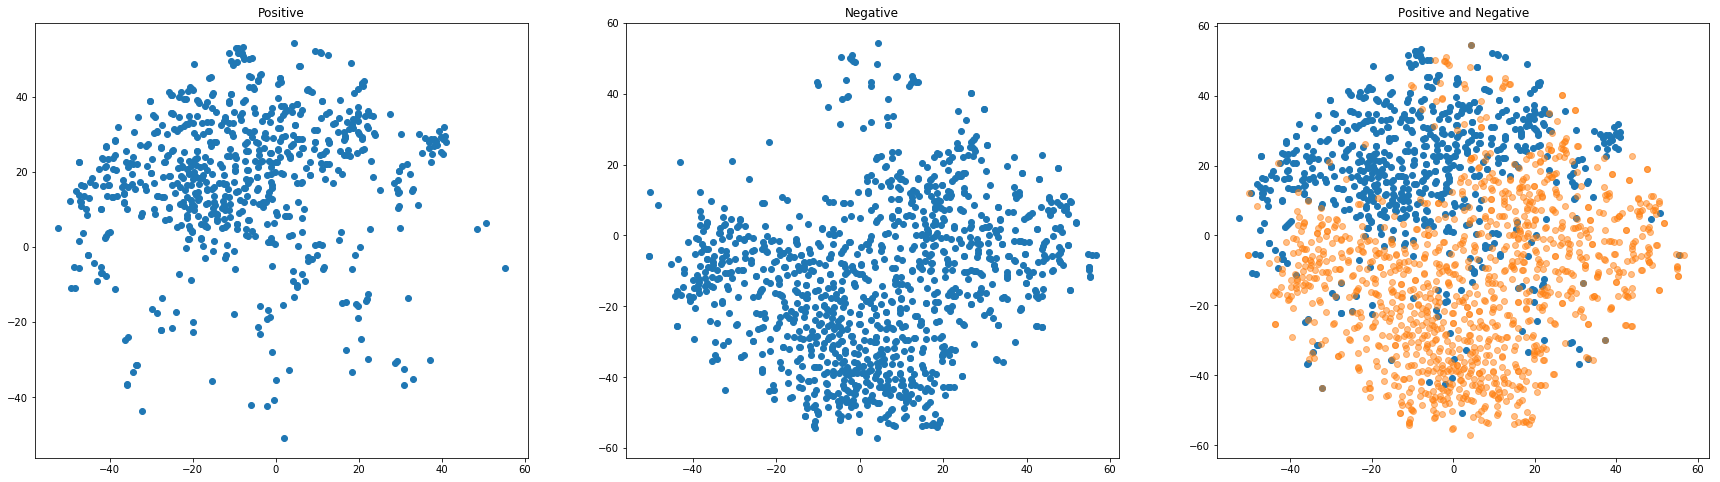

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [42]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [44]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

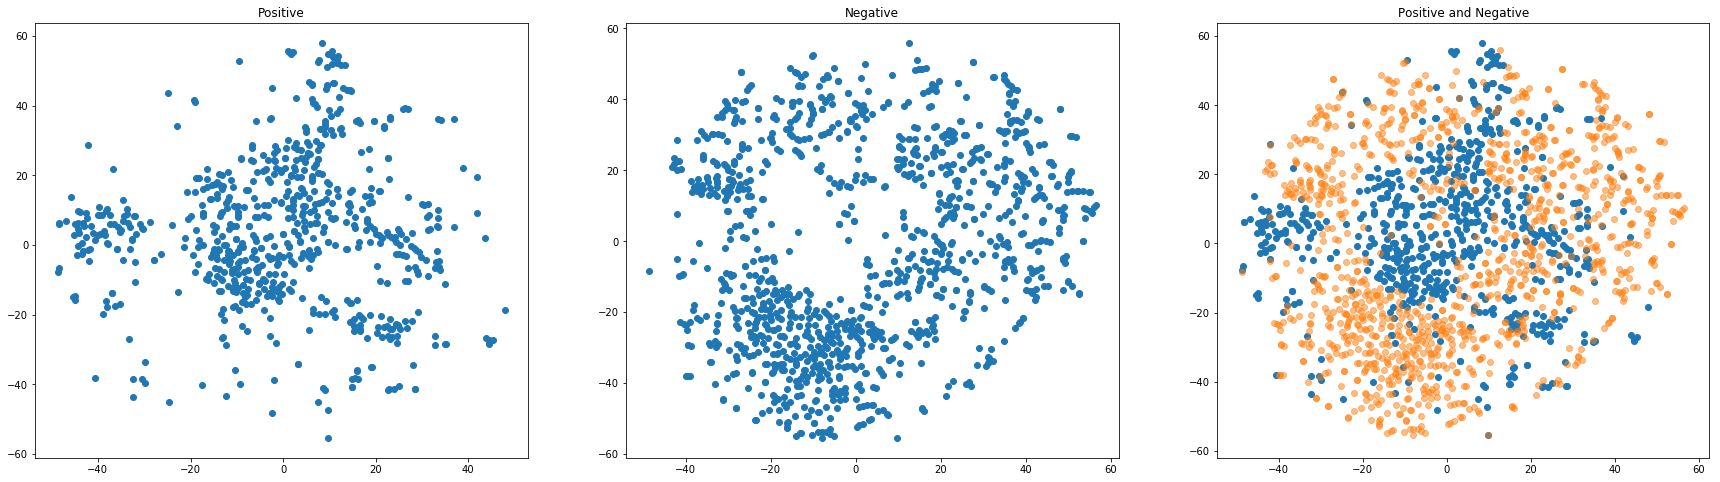

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings.

In [46]:
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result

def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [47]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.0164222895038493 1.024771183345472 1.0210711937924626
Relative improvments:
Dense: 0.8214001136966529
LSTM: 0.4573792149798879


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [48]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('dense_embedding_LSTM_model_large.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 261s 13ms/step - loss: 0.3526 - acc: 0.8547 - val_loss: 0.3109 - val_acc: 0.8706
Epoch 2/10
20000/20000 [==============================] - 269s 13ms/step - loss: 0.2525 - acc: 0.9009 - val_loss: 0.2877 - val_acc: 0.8878
Epoch 3/10
20000/20000 [==============================] - 264s 13ms/step - loss: 0.2212 - acc: 0.9144 - val_loss: 0.2788 - val_acc: 0.8834
Epoch 4/10
20000/20000 [==============================] - 268s 13ms/step - loss: 0.2045 - acc: 0.9208 - val_loss: 0.2611 - val_acc: 0.8912
Epoch 5/10
20000/20000 [==============================] - 261s 13ms/step - loss: 0.1938 - acc: 0.9253 - val_loss: 0.2670 - val_acc: 0.8974
Epoch 6/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.1830 - acc: 0.9290 - val_loss: 0.2619 - val_acc: 0.8930
Epoch 7/10
20000/20000 [==============================] - 258s 13ms/step - loss: 0.1753 - acc: 0.9335 - val_loss: 0.2

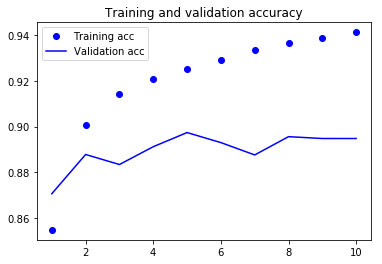

In [49]:
plot_history(history)

In [50]:
from keras.layers import GRU
import keras

# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,),
    keras.callbacks.ModelCheckpoint(filepath='GRUs_model_large.h5', monitor='val_loss', save_best_only=True,)]

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True))
model.add(GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, shuffle=True,
                    epochs=200,
                    batch_size=128,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/200
20000/20000 [==============================] - 187s 9ms/step - loss: 0.4800 - acc: 0.7732 - val_loss: 0.3621 - val_acc: 0.8410
Epoch 2/200
20000/20000 [==============================] - 181s 9ms/step - loss: 0.3192 - acc: 0.8690 - val_loss: 0.3238 - val_acc: 0.8566
Epoch 3/200
20000/20000 [==============================] - 178s 9ms/step - loss: 0.2689 - acc: 0.8899 - val_loss: 0.2669 - val_acc: 0.8890
Epoch 4/200
20000/20000 [==============================] - 176s 9ms/step - loss: 0.2484 - acc: 0.9013 - val_loss: 0.3471 - val_acc: 0.8538
Epoch 5/200
20000/20000 [==============================] - 176s 9ms/step - loss: 0.2384 - acc: 0.9066 - val_loss: 0.2573 - val_acc: 0.8926
Epoch 6/200
20000/20000 [==============================] - 194s 10ms/step - loss: 0.2295 - acc: 0.9082 - val_loss: 0.2546 - val_acc: 0.8968
Epoch 7/200
20000/20000 [==============================] - 187s 9ms/step - loss: 0.2222 - acc: 0.9111 - val_loss: 0.

In [51]:
plot_history(history)

Note our model is much better than previous models on overfitting.

Now we load the best model back. And then we evaluate the model using the test data.

In [52]:
model = keras.models.load_model('GRUs_model_large.h5')

In [53]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [54]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 119s 5ms/step


[0.23837184217751026, 0.90568]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think that is most promising. The model is also realtively simple.